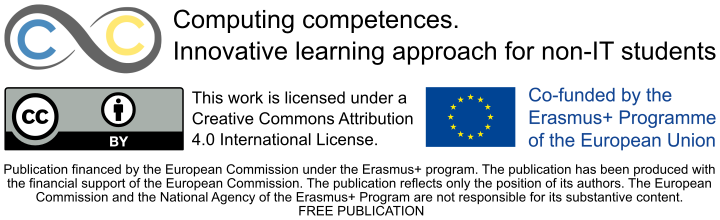


Manual - introduction
===

O1 - examples
*********

To try out the code that illustrates the simple automation problems used in chapter 1 of the programming manual, please run the cell below. It will create the file system we use in the photo example.

    -2019
      ᒻ--Trip to Krakow
      ᒻ--Fireworks show
      ᒻ--John birthday party

    -2018
      ᒻ--Holidays in Bari
      ᒻ--Weekend in Paris

In [ ]:
import os
import random
import requests

CAT = "https://bit.ly/ccinfcat"
catimg = requests.get(CAT).content

pic_structure = {2018: ['Holidays in Bari', 
                    'Weekend in Paris'],
                 2019: ['Trip to Krakow', 
                    'Fireworks show',
                    'John birthday party']}

for year in pic_structure:
    for event in pic_structure[year]:
        d = os.path.join(str(year), event)
        try: 
            os.makedirs(d)
            print(d, 'created')
        except OSError as error: 
            print(error)
            
        month = random.randint(1, 12)
        day = random.randint(1, 28)
        
        for nr in random.sample(range(100, 999), 12):
            fname = f'IMG{year}{month}{day}{nr}.JPG'
            loc = os.path.join(d, fname)
            with open(loc, 'wb') as handler:
                handler.write(catimg)

2018/Holidays in Bari created
2018/Weekend in Paris created
2019/Trip to Krakow created
2019/Fireworks show created
2019/John birthday party created


Now take a look at the directory where this notebook is located. If the above code does not raise any errors (you can't see anything in red), you should have created the appropriate directory structure.


### Example 1

If we want to try the code in the introduction, we can do so now:

In [ ]:
import os

year = '2018'
picture_dir = 'Holidays in Bari'
working_dir = os.path.join(year, picture_dir)

for i, filename in enumerate(os.listdir(working_dir)):
    src = os.path.join(working_dir, filename)
    dst = os.path.join(working_dir,
            working_dir.replace('/', '_').replace(' ', '_') +
            "_" + str(i).zfill(3) + '.jpg')
    os.rename(src, dst)

### Example 2a

In [ ]:
txt = '''
You say, „Yes”, I say, „No”
You say, „Stop” but I say, „Go, go, go”
Oh no
You say, „Goodbye”, and I say, „Hello, hello, hello”
I don’t know why you say, „Goodbye”, I say, „Hello, hello, hello”
I don’t know why you say, „Goodbye”, I say, „Hello”
'''

fixed_txt = ''
for letter in txt.replace('\n', ' '):
    l = letter.lower()
    if l in 'abcdefghijklmnopqrstuvwxyz ’':
        fixed_txt += l

zipf = {}
for word in fixed_txt.split():
    if word in zipf:
        zipf[word] += 1
    else:
        zipf[word] = 1

for z in sorted(zipf.items(), key=lambda x: x[1], reverse=True):
    print('{0[0]}\t{0[1]}'.format(z))

say	10
i	7
hello	7
you	5
go	3
goodbye	3
no	2
don’t	2
know	2
why	2
yes	1
stop	1
but	1
oh	1
and	1


### Example 2b

In [ ]:
from string import ascii_lowercase
import requests

url = 'https://www.gutenberg.org/cache/epub/3070/pg3070.txt'
txt = requests.get(url).text

fixed_txt = ""
for letter in txt.replace('\n', ' '):
    l = letter.lower()
    if l in ascii_lowercase + ' ':
        fixed_txt += l

zipf = {}
for word in fixed_txt.split():
    if word in zipf:
        zipf[word] += 1
    else:
        zipf[word] = 1

for z in sorted(zipf.items(), key=lambda x: x[1], reverse=True)[:10]:
    print('{0[0]}\t{0[1]}'.format(z))

the	3510
of	1718
and	1686
to	1486
i	1464
a	1358
that	1143
it	985
in	965
he	914


Finally, it is a good idea to clean up the directory and delete the files and directories that we created at the very beginning.

In [ ]:
import shutil

for year in pic_structure:
    try:
        shutil.rmtree(str(year))
        print(f"Directory {year} removed successfully")
    except OSError as e:
        print("Error: %s : %s" % (dir_path, e.strerror))

Directory 2018 removed successfully
Directory 2019 removed successfully
